In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2


In [48]:
df.groupby('Ethnicity').Sex.value_counts()

Ethnicity       Sex
Hispanic        m       31
                f        9
Latino          m       15
                f       11
Native Indian   m        3
Others          m       22
                f       13
Pacifica        m        5
                f        3
White European  m      240
                f       94
asian           m      230
                f       69
black           m       37
                f       16
middle eastern  m      108
                f       80
mixed           f        4
                m        4
south asian     m       40
                f       20
Name: Sex, dtype: int64

In [3]:
df_old = pd.read_csv('Toddler Autism dataset July 2018.csv')

In [4]:
df = df_old.rename(columns={'Age_Mons': 'Age', 'Qchat-10-Score':'qchat_score', 'Family_mem_with_ASD':'family_asd', 'Class/ASD Traits ':'asd_traits'})
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,qchat_score,Sex,Ethnicity,Jaundice,family_asd,Who completed the test,asd_traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [75]:
df = df[df['asd_traits'] != 'No']
df.shape

(728, 19)

# Independent t-test 

## 'Sex' vs 'qchat_score'

Null Hypothesis: There is no statisical difference between male and female mean qchat scores.

Alternative Hypothesis: There is a statistical difference between male and female mean qchat scores. 

In [76]:
# SEPARATE GENDER INTO TWO DF'S FOR INDEPENDENT T-TEST
male_df = df.loc[(df['Sex'] == 'm')]
female_df = df.loc[(df['Sex']== 'f')]

In [77]:
male_df.shape

(534, 19)

In [81]:
df.groupby('Sex').qchat_score.mean()

Sex
f    6.829897
m    6.773408
Name: qchat_score, dtype: float64

In [80]:
# TWO SAMPLE T-TEST OF GENDER AND QCHAT-SCORE
print(stats.ttest_ind(male_df['qchat_score'], female_df['qchat_score'], equal_var=False))
print('WE FAIL TO REJECT THE NULL HYPOTHESIS SINCE OUR P-VALUE IS LESS THAN 0.05')

Ttest_indResult(statistic=-0.3602431012464004, pvalue=0.7188758523230369)
WE FAIL TO REJECT THE NULL HYPOTHESIS SINCE OUR P-VALUE IS LESS THAN 0.05


Text(0, 0.5, 'QChat-10 Score (1-10)')

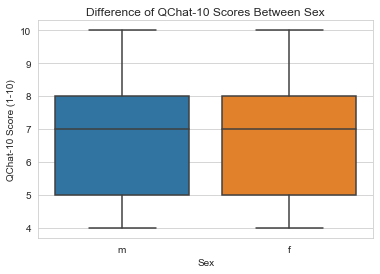

In [79]:
sns.set_style("whitegrid") 
  
ax = sns.boxplot(x = 'Sex', y = 'qchat_score', data = df)
ax.set_title('Difference of QChat-10 Scores Between Sex')
ax.set_xlabel('Sex')
ax.set_ylabel('QChat-10 Score (1-10)')

## 'family_asd' vs 'qchat_score'

Null Hypothesis: There is not a statistical difference between mean qchat scores of individuals with immediate family that have ASD and those who dont.

Alternative Hypothesis: There is a statistical difference between mean qchat scores of individuals with immediate family that have ASD and those who dont.

In [82]:
# SEPARATE FAMILY WITH ASD INTO TWO DF'S FOR INDEPENDENT T-TEST
y_family = df.loc[(df['family_asd'] == 'yes')]
n_family = df.loc[(df['family_asd']== 'no')]

In [83]:
# TWO SAMPLE T-TEST OF FAMILY AND QCHAT-SCORE
print(stats.ttest_ind(y_family['qchat_score'], n_family['qchat_score'], equal_var=False))
print('WE FAIL TO REJECT THE NULL HYPOTHESIS BECAUSE OUR P-VALUE IS ABOVE 0.05')

Ttest_indResult(statistic=1.4272440393589116, pvalue=0.1554187508493741)
WE FAIL TO REJECT THE NULL HYPOTHESIS BECAUSE OUR P-VALUE IS ABOVE 0.05


## 'Jaundice' vs 'qchat_score'

Null Hypothesis: The means of qchat scores between individuals who have jaundice and those who do not are the same.

Alternative Hypothesis: The means of qchat scores between individuals who have jaundice and those who do not are not the same.

In [84]:
# SEPARATE JAUNDICE INTO TWO DF'S FOR INDEPENDENT T-TEST
y_jaundice = df.loc[(df['Jaundice'] == 'yes')]
n_jaundice = df.loc[(df['Jaundice']== 'no')]

In [85]:
# TWO SAMPLE T-TEST OF FAMILY AND QCHAT-SCORE
print(stats.ttest_ind(y_jaundice['qchat_score'], n_jaundice['qchat_score'], equal_var=False))
print('WE FAIL TO REJECT THE NULL HYPOTHESIS BECAUSE OUR P-VALUE IS ABOVE 0.05')

Ttest_indResult(statistic=-1.6824077449272743, pvalue=0.09330055128685265)
WE FAIL TO REJECT THE NULL HYPOTHESIS BECAUSE OUR P-VALUE IS ABOVE 0.05


# One-Way ANOVA

## 'Ethnicity' vs 'qchat_score'

Null Hypothesis: There is no statisticially significant difference of mean qchat scores between groups of ethnicity.

Alternative Hypothesis: There is a statisticially significant difference of mean qchat scores between groups of ethnicity.

In [86]:
print(stats.f_oneway(df['qchat_score'][df['Ethnicity'] == 'White European'],
                df['qchat_score'][df['Ethnicity'] == 'asian'], 
                df['qchat_score'][df['Ethnicity'] == 'middle eastern'],
               df['qchat_score'][df['Ethnicity'] == 'south asian'],
               df['qchat_score'][df['Ethnicity'] == 'black'],
               df['qchat_score'][df['Ethnicity'] == 'Hispanic'],
               df['qchat_score'][df['Ethnicity'] == 'Others'],
               df['qchat_score'][df['Ethnicity'] == 'Latino'],
               df['qchat_score'][df['Ethnicity'] == 'mixed'],
               df['qchat_score'][df['Ethnicity'] == 'Pacifica'],
               df['qchat_score'][df['Ethnicity'] == 'Native Indian']))

print('WE REJECT THE NULL HYPOTHESIS SINCE OUR P-VALUE IS HIGHER THAN 0.05')

F_onewayResult(statistic=2.7692942391845814, pvalue=0.0023152025613468693)
WE REJECT THE NULL HYPOTHESIS SINCE OUR P-VALUE IS HIGHER THAN 0.05


In [91]:
df.groupby('Ethnicity').qchat_score.mean()

Ethnicity
Hispanic          6.733333
Latino            7.250000
Native Indian     7.000000
Others            6.689655
Pacifica          7.857143
White European    7.048000
asian             6.264151
black             7.282051
middle eastern    6.947917
mixed             6.800000
south asian       6.756757
Name: qchat_score, dtype: float64

In [90]:
# POST HOC TEST 
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(df['qchat_score'], df['Ethnicity'])
mc_results = mc.tukeyhsd()
print(mc_results)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2     meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------
      Hispanic         Latino   0.5167    0.9 -1.2535  2.2869  False
      Hispanic  Native Indian   0.2667    0.9 -3.4465  3.9799  False
      Hispanic         Others  -0.0437    0.9 -1.6406  1.5532  False
      Hispanic       Pacifica   1.1238    0.9 -1.4502  3.6978  False
      Hispanic White European   0.3147    0.9 -0.8702  1.4995  False
      Hispanic          asian  -0.4692    0.9 -1.6653   0.727  False
      Hispanic          black   0.5487    0.9 -0.9404  2.0379  False
      Hispanic middle eastern   0.2146    0.9  -1.068  1.4972  False
      Hispanic          mixed   0.0667    0.9 -2.8954  3.0288  False
      Hispanic    south asian   0.0234    0.9 -1.4831    1.53  False
        Latino  Native Indian    -0.25    0.9 -4.0466  3.5466  False
        Latino         Others  -0.

# CHI Square Test

In [88]:
df_both = df.groupby('Sex').Ethnicity.value_counts()
df_new = df_both.unstack()
values = {'Native Indian': 0}
df_new.fillna(value=values)

Ethnicity,Hispanic,Latino,Native Indian,Others,Pacifica,White European,asian,black,middle eastern,mixed,south asian
Sex,,,,,,,,,,,
f,6.0,7.0,0.0,9.0,3.0,65.0,52.0,5.0,32.0,3.0,12.0
m,24.0,13.0,3.0,20.0,4.0,185.0,160.0,34.0,64.0,2.0,25.0


In [89]:
stat, p, dof, expected = chi2_contingency(df_both)
print(expected)

#interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f)' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
#interpret p-value
alpha= 1-prob
print('signigicance=%.3f, p=%.3f,' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else: 
    print('Independent (fail to reject)')

[ 65.  52.  32.  12.   9.   7.   6.   5.   3.   3. 185. 160.  64.  34.
  25.  24.  20.  13.   4.   3.   2.]
probability=0.950, critical=nan, stat=0.000)
Independent (fail to reject H0)
signigicance=0.050, p=1.000,
Independent (fail to reject)
